In [75]:
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy
import json
from klout import *
import time
from datetime import date

In [2]:

consumer_key = '8kqqyPcjvb1P75OO9rtzYopnB'
consumer_secret = '7WaHHBVvjrvPJLLdP5a0e7pb2oHqt5C5trHrRfd1pp8pQpf3aE'

access_token ='262429770-QcqtCDv6GZ1PUDjSRMbO9117ociCqc0a2Y9Cg9CE'
access_token_secret = 'ZHUXvN1UP7NvmvSZHn8Zp6Ap0EKeqHZhXzL7XZ9B5Z0Pd'

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [64]:
k = Klout('vk235ehnfw2t88qv4s4kzdt8')

# Get kloutId of the user by inputting a twitter screenName
kloutID = k.identity.klout(screenName = "Converse").get('id')
print(kloutID)
# Get klout score of the user
score = k.user.score(kloutId = kloutID, timeout = 10).get('score')
print(score)

939833
84.8541146162723


In [3]:
# Function to get follower info of one user
# For now, I have limited this to 10 followers per user for proof of concept.

#max_num_followers = 20
#min_klout = 60
#min_followers = 1000

def get_all_follower_info(twitter_username):
    # twitter_username is just the twitter handle of a user without the '@' symbol
    # max_num_followers is the maximum number of followers to search for for each user
    # min_klout is the minimum klout score to keep in the dataframe for the next round of searching
    
    being_followed = []
    followed_by = []
    user_id = []
    language = []
    location = []
    followers = []
    friends = []
    num_favorites = []
    num_lists = []
    description = []
    created_at = []
    name = []
    statuses_count = []
    verified = []
    
    count = 1
    
    for user in tweepy.Cursor(api.followers, screen_name = twitter_username).items(10000):
        being_followed.append(twitter_username)
        followed_by.append(user.screen_name)
        user_id.append(user.id)
        language.append(user.lang)
        location.append(user.location)
        followers.append(user.followers_count)
        friends.append(user.friends_count)
        num_favorites.append(user.favourites_count)
        num_lists.append(user.listed_count)
        description.append(user.description)
        created_at.append(user.created_at)
        name.append(user.name)
        statuses_count.append(user.statuses_count)
        verified.append(user.verified)
        
        print(count)
        count += 1

    user_info = pd.DataFrame({"being_followed" : being_followed,
                              "followed_by" : followed_by,
                              "user_id" : user_id,
                              "language" : language,
                              "location" : location,
                              "followers" : followers,
                              "friends" : friends,
                              "num_favorites" : num_favorites,
                              "num_lists" : num_lists,
                              "description" : description,
                              "created_at" : created_at,
                              "name" : name,
                              "statuses_count" : statuses_count,
                              "verified" : verified})
    
    ### add a column to the dataframe with Klout Score
#    k = Klout('vk235ehnfw2t88qv4s4kzdt8')
#
#
#    klout_list = []
#    for row in range(0, len(user_info)):
#        try:
#            # Get kloutId of the user by inputting a twitter screenName
#            kloutID = k.identity.klout(screenName = user_info['followed_by'][row]).get('id')
#
#            # Get klout score of the user
#            score = k.user.score(kloutId = kloutID, timeout = 10).get('score')
#            klout_list.append(score)
#
#        except KloutHTTPError:
#            klout_list.append(0)
#            continue
#
#    user_info['klout'] = klout_list
#    
#    # remove anyone with low klout
#    user_info = user_info[user_info['klout'] > min_klout]
    
    # remove anyone with few followers
    #user_info = user_info[user_info['followers'] > min_followers]
    
    return(user_info)


In [8]:
converse_followers = get_all_follower_info("Converse")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [9]:
adidas_followers = get_all_follower_info("adidasoriginals")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
Rate limit reached. Sleeping for: 887
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
26

In [12]:
converse_followers.head()

,being_followed,created_at,description,followed_by,followers,friends,language,location,name,num_favorites,num_lists,statuses_count,user_id,verified
0,Converse,2012-10-25 09:15:36,"The millennial guide to #fashion, #beauty, #li...",styleXstyle,1841,473,en,Singapore,styleXstyle,563,34,6473,903535512,False
1,Converse,2016-12-18 23:41:30,,purav_124,52,109,en,,Purav,38,0,452,810631102763298820,False
2,Converse,2015-06-25 00:34:36,Be Who You Are.. Don't Change For Nobody.,isaacs0524,127,726,en,"Dayton, OH",Logan Beth,29,1,11,3344782953,False
3,Converse,2014-02-12 03:56:06,,bairdashi,842,921,ru,,НОВОСТИ СЕРИАЛОВ,203,10,236,2339702900,False
4,Converse,2017-02-19 03:47:39,*low-key*\n\n\n \n\n\n\...,Sanchit_Kam,51,256,en,"Mumbai, India",Sanchit Kamble,350,0,211,833161094436880384,False


In [13]:
adidas_followers.head()

,being_followed,created_at,description,followed_by,followers,friends,language,location,name,num_favorites,num_lists,statuses_count,user_id,verified
0,adidasoriginals,2013-05-11 13:15:38,Comunicólogo y Cantinflólogo ˚ Semiología y Gr...,Luisen1409,71,63,es,,Luis Enrique,158,0,264,1420633166,False
1,adidasoriginals,2017-01-13 23:14:54,WHS girls basketball🏀track and field🏃🏼‍♀️Girls...,10_alina_,28,161,en,"Texas, USA",alina,13,0,8,820046494552047616,False
2,adidasoriginals,2016-04-04 16:25:16,female,PrettyAss_Panda,68,324,en,"Chicago, IL",PuertoRican_Oueen,186,0,81,717025250630889472,False
3,adidasoriginals,2016-05-21 13:36:25,新入生歓迎こちらからご挨拶に伺います。,thatisnuts3110,116,102,en,,齋藤 優気,520,0,1700,734014987874623488,False
4,adidasoriginals,2017-04-28 04:41:52,,_hd_ido12me,9,151,en,,hd_ido1022,0,0,0,857817116677873665,False


In [10]:
#converse_followers.to_csv("converse_followers.csv")

In [11]:
#adidas_followers.to_csv("adidas_followers.csv")

In [24]:
converse_followers = pd.read_csv("converse_followers2.csv", engine='python')
#converse_followers = converse_followers.drop(['Unnamed: 0'], axis = 1)

In [25]:
adidas_followers = pd.read_csv("adidas_followers2.csv", engine='python')
#adidas_followers = adidas_followers.drop(['Unnamed: 0'], axis = 1)

---

#### Add variable: follower-to-friend ratio

In [85]:
converse_followers['follower_friend_ratio'] = converse_followers.followers / (1 + converse_followers.friends)
adidas_followers['follower_friend_ratio'] = adidas_followers.followers / (1 + adidas_followers.friends)

### Describe the Dataframes

In [86]:
converse_followers.describe()

,followers,friends,num_favorites,num_lists,statuses_count,user_id,follower_friend_ratio
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000
mean,9.972002e+02,818.350300,1622.734900,6.889500,2.336707e+03,4.390988e+17,0.937085
std,1.723677e+04,8362.880423,5927.100582,133.801664,1.572990e+04,4.107832e+17,16.401090
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,6.084912e+06,0.000000
25%,1.700000e+01,98.000000,12.000000,0.000000,7.000000e+00,1.919768e+09,0.117002
50%,5.300000e+01,231.000000,116.000000,0.000000,7.300000e+01,7.324565e+17,0.221771
75%,1.940000e+02,564.000000,833.250000,1.000000,7.800000e+02,8.442630e+17,0.458015
max,1.021078e+06,502507.000000,136729.000000,11577.000000,1.166572e+06,8.597020e+17,1150.904762


In [87]:
adidas_followers.describe()

,followers,friends,num_favorites,num_lists,statuses_count,user_id,follower_friend_ratio
count,1.000000e+04,10000.00000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000
mean,7.594794e+02,471.08850,1128.235700,2.550700,1.996912e+03,4.380448e+17,1.485668
std,1.630526e+04,5610.81557,4995.542351,33.900162,1.459890e+04,4.147962e+17,22.298830
min,0.000000e+00,0.00000,0.000000,0.000000,0.000000e+00,3.468141e+06,0.000000
25%,1.400000e+01,51.00000,2.000000,0.000000,2.000000e+00,1.615412e+09,0.159083
50%,3.900000e+01,139.00000,33.000000,0.000000,2.200000e+01,7.317259e+17,0.338710
75%,1.380000e+02,336.00000,451.000000,0.000000,4.382500e+02,8.556856e+17,0.774001
max,1.095978e+06,498329.00000,188798.000000,2065.000000,1.166575e+06,8.597828e+17,1273.266187


In [88]:
print(997 - 17236/np.sqrt(10000))
print(997 + 17236/np.sqrt(10000))

824.64
1169.36


In [89]:
all_data = pd.concat([converse_followers, adidas_followers])

In [90]:
all_data.shape

(20000, 15)

In [91]:
all_data.head()

,being_followed,created_at,description,followed_by,followers,friends,language,location,name,num_favorites,num_lists,statuses_count,user_id,verified,follower_friend_ratio
0,Converse,2012-10-25,"The millennial guide to #fashion, #beauty, #li...",styleXstyle,1841,473,en,Singapore,styleXstyle,563,34,6473,9.035355e+08,False,3.883966
1,Converse,2016-12-18,NaN,purav_124,52,109,en,NaN,Purav,38,0,452,8.106310e+17,False,0.472727
2,Converse,2015-06-25,Be Who You Are.. Don't Change For Nobody.,isaacs0524,127,726,en,"Dayton, OH",Logan Beth,29,1,11,3.344783e+09,False,0.174691
3,Converse,2014-02-12,NaN,bairdashi,842,921,ru,NaN,??????? ????????,203,10,236,2.339703e+09,False,0.913232
4,Converse,2017-02-19,*low-key*\n\n\n\n\n\n \...,Sanchit_Kam,51,256,en,"Mumbai, India",Sanchit Kamble,350,0,211,8.331610e+17,False,0.198444


In [92]:
df2 = all_data.reset_index(drop=True)

In [93]:
type(df2['created_at'][0])

str

In [94]:
df2 = df2.set_index('created_at')

df2.index = df2.index.to_datetime()

df2.head()

,being_followed,description,followed_by,followers,friends,language,location,name,num_favorites,num_lists,statuses_count,user_id,verified,follower_friend_ratio
2012-10-25,Converse,"The millennial guide to #fashion, #beauty, #li...",styleXstyle,1841,473,en,Singapore,styleXstyle,563,34,6473,9.035355e+08,False,3.883966
2016-12-18,Converse,NaN,purav_124,52,109,en,NaN,Purav,38,0,452,8.106310e+17,False,0.472727
2015-06-25,Converse,Be Who You Are.. Don't Change For Nobody.,isaacs0524,127,726,en,"Dayton, OH",Logan Beth,29,1,11,3.344783e+09,False,0.174691
2014-02-12,Converse,NaN,bairdashi,842,921,ru,NaN,??????? ????????,203,10,236,2.339703e+09,False,0.913232
2017-02-19,Converse,*low-key*\n\n\n\n\n\n \...,Sanchit_Kam,51,256,en,"Mumbai, India",Sanchit Kamble,350,0,211,8.331610e+17,False,0.198444


In [95]:
df2['account_created'] = df2.index
df2 = df2.reset_index(drop=True)

In [96]:
df2.head()

,being_followed,description,followed_by,followers,friends,language,location,name,num_favorites,num_lists,statuses_count,user_id,verified,follower_friend_ratio,account_created
0,Converse,"The millennial guide to #fashion, #beauty, #li...",styleXstyle,1841,473,en,Singapore,styleXstyle,563,34,6473,9.035355e+08,False,3.883966,2012-10-25
1,Converse,NaN,purav_124,52,109,en,NaN,Purav,38,0,452,8.106310e+17,False,0.472727,2016-12-18
2,Converse,Be Who You Are.. Don't Change For Nobody.,isaacs0524,127,726,en,"Dayton, OH",Logan Beth,29,1,11,3.344783e+09,False,0.174691,2015-06-25
3,Converse,NaN,bairdashi,842,921,ru,NaN,??????? ????????,203,10,236,2.339703e+09,False,0.913232,2014-02-12
4,Converse,*low-key*\n\n\n\n\n\n \...,Sanchit_Kam,51,256,en,"Mumbai, India",Sanchit Kamble,350,0,211,8.331610e+17,False,0.198444,2017-02-19


In [97]:
#type(df2['account_created'][0])
(dt.datetime.today() - df2['account_created'][0]).days

1652

In [98]:
df2['today'] = dt.datetime.today()
df2['days_active'] = (df2['today'] - df2['account_created'])

In [99]:
df2.head()

,being_followed,description,followed_by,followers,friends,language,location,name,num_favorites,num_lists,statuses_count,user_id,verified,follower_friend_ratio,account_created,today,days_active
0,Converse,"The millennial guide to #fashion, #beauty, #li...",styleXstyle,1841,473,en,Singapore,styleXstyle,563,34,6473,9.035355e+08,False,3.883966,2012-10-25,2017-05-04 11:29:45.095312,1652 days 11:29:45.095312
1,Converse,NaN,purav_124,52,109,en,NaN,Purav,38,0,452,8.106310e+17,False,0.472727,2016-12-18,2017-05-04 11:29:45.095312,137 days 11:29:45.095312
2,Converse,Be Who You Are.. Don't Change For Nobody.,isaacs0524,127,726,en,"Dayton, OH",Logan Beth,29,1,11,3.344783e+09,False,0.174691,2015-06-25,2017-05-04 11:29:45.095312,679 days 11:29:45.095312
3,Converse,NaN,bairdashi,842,921,ru,NaN,??????? ????????,203,10,236,2.339703e+09,False,0.913232,2014-02-12,2017-05-04 11:29:45.095312,1177 days 11:29:45.095312
4,Converse,*low-key*\n\n\n\n\n\n \...,Sanchit_Kam,51,256,en,"Mumbai, India",Sanchit Kamble,350,0,211,8.331610e+17,False,0.198444,2017-02-19,2017-05-04 11:29:45.095312,74 days 11:29:45.095312


In [100]:
df2.groupby(['being_followed']).describe()

days_active  follower_friend_ratio  \
being_followed                                                            
Converse        count                      10000           10000.000000   
                mean    756 days 08:48:54.215312               0.937085   
                std     868 days 18:27:53.388708              16.401090   
                min       1 days 11:29:45.095312               0.000000   
                25%      44 days 11:29:45.095312               0.117002   
                50%     352 days 11:29:45.095312               0.221771   
                75%    1310 days 17:29:45.095312               0.458015   
                max    3641 days 11:29:45.095312            1150.904762   
adidasoriginals count                      10000           10000.000000   
                mean    768 days 03:10:30.215312               1.485668   
                std     883 days 04:56:26.021250              22.298830   
                min       1 days 11:29:45.095312               0.000000   
                25%      12 days 11:29:45.095312               0.159083   
                50%     354 days 11:29:45.095312               0.338710   
                75%    1372 days 17:29:45.095312               0.774001   
                max    3683 days 11:29:45.095312            1273.266187   

                          followers        friends  num_favorites  \
being_followed                                                      
Converse        count  1.000000e+04   10000.000000   10000.000000   
                mean   9.972002e+02     818.350300    1622.734900   
                std    1.723677e+04    8362.880423    5927.100582   
                min    0.000000e+00       1.000000       0.000000   
                25%    1.700000e+01      98.000000      12.000000   
                50%    5.300000e+01     231.000000     116.000000   
                75%    1.940000e+02     564.000000     833.250000   
                max    1.021078e+06  502507.000000  136729.000000   
adidasoriginals count  1.000000e+04   10000.000000   10000.000000   
                mean   7.594794e+02     471.088500    1128.235700   
                std    1.630526e+04    5610.815570    4995.542351   
                min    0.000000e+00       0.000000       0.000000   
                25%    1.400000e+01      51.000000       2.000000   
                50%    3.900000e+01     139.000000      33.000000   
                75%    1.380000e+02     336.000000     451.000000   
                max    1.095978e+06  498329.000000  188798.000000   

                          num_lists  statuses_count       user_id  
being_followed                                                     
Converse        count  10000.000000    1.000000e+04  1.000000e+04  
                mean       6.889500    2.336707e+03  4.390988e+17  
                std      133.801664    1.572990e+04  4.107832e+17  
                min        0.000000    0.000000e+00  6.084912e+06  
                25%        0.000000    7.000000e+00  1.919768e+09  
                50%        0.000000    7.300000e+01  7.324565e+17  
                75%        1.000000    7.800000e+02  8.442630e+17  
                max    11577.000000    1.166572e+06  8.597020e+17  
adidasoriginals count  10000.000000    1.000000e+04  1.000000e+04  
                mean       2.550700    1.996912e+03  4.380448e+17  
                std       33.900162    1.459890e+04  4.147962e+17  
                min        0.000000    0.000000e+00  3.468141e+06  
                25%        0.000000    2.000000e+00  1.615412e+09  
                50%        0.000000    2.200000e+01  7.317259e+17  
                75%        0.000000    4.382500e+02  8.556856e+17  
                max     2065.000000    1.166575e+06  8.597828e+17

---

## Clustering (k-Means)

I'm only going to look at continuous variables for clustering.

In [109]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from collections import Counter

In [120]:
follower_data = df2[['follower_friend_ratio', 'followers', 'friends', 
                    'num_favorites', 'num_lists', 'statuses_count']]

In [124]:
log_follower_data = np.log(follower_data+1)
log_follower_data.shape

(20000, 6)

In [125]:
x = log_follower_data.values #returns a numpy array
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)
log_follower_data_scaled = pd.DataFrame(x_scaled)

In [126]:
follower_data_scaled.describe()

,0,1,2,3,4,5
count,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,1.042274e-16,-4.126217e-16,1.088851e-17,-1.582082e-15,-2.997914e-15,1.351252e-16
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-6.188603e-02,-5.235360e-02,-9.051461e-02,-2.507060e-01,-4.835141e-02,-1.427869e-01
25%,-5.505432e-02,-5.145953e-02,-8.040625e-02,-2.497946e-01,-4.835141e-02,-1.425892e-01
50%,-4.813174e-02,-4.967137e-02,-6.524372e-02,-2.386763e-01,-4.835141e-02,-1.399533e-01
75%,-3.086740e-02,-4.257835e-02,-2.902212e-02,-1.355131e-01,-4.835141e-02,-1.031661e-01
max,6.498593e+01,6.527362e+01,7.045835e+01,3.416099e+01,1.185433e+02,7.673134e+01


In [130]:
error = np.zeros(11)

for k in range(1,11):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(log_follower_data_scaled)
    error[k] = kmeans.inertia_

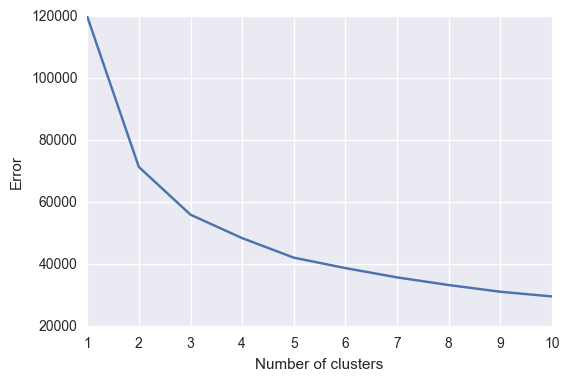

In [131]:
%matplotlib inline

plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
dummy = plt.ylabel('Error')

YOLO, let's go with 5 clusters!

In [132]:
km = KMeans(n_clusters = 5,
           init = "k-means++",
           n_init = 10,
           max_iter = 300,
           tol = 1e-04,
           random_state = 0)

clustered = km.fit_predict(log_follower_data_scaled)

In [133]:
Counter(clustered)

Counter({0: 1603, 1: 5958, 2: 5320, 3: 6884, 4: 235})

In [152]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=100)
kmeans.fit_predict(log_follower_data_scaled)
labels = kmeans.labels_

In [153]:
Counter(labels)

Counter({0: 6884, 1: 5927, 2: 5299, 3: 1654, 4: 236})

In [154]:
df2['cluster'] = pd.Series(labels)

In [155]:
df2.groupby(['cluster']).describe()

days_active  follower_friend_ratio     followers  \
cluster                                                                         
0       count                       6884            6884.000000  6.884000e+03   
        mean    566 days 19:16:26.025004               0.247745  5.208338e+01   
        std     755 days 21:01:32.876956               0.236682  5.800956e+01   
        min       1 days 11:29:45.095312               0.000000  0.000000e+00   
        25%      34 days 11:29:45.095312               0.104555  2.200000e+01   
        50%     187 days 11:29:45.095312               0.177450  3.800000e+01   
        75%     855 days 11:29:45.095312               0.300997  6.300000e+01   
        max    3683 days 11:29:45.095312               3.115385  1.389000e+03   
1       count                       5927            5927.000000  5.927000e+03   
        mean    316 days 22:06:32.350247               0.394153  1.338249e+01   
        std     590 days 22:52:41.378273               0.587677  1.506862e+01   
        min       1 days 11:29:45.095312               0.000000  0.000000e+00   
        25%       6 days 11:29:45.095312               0.093855  5.000000e+00   
        50%      35 days 11:29:45.095312               0.214286  1.000000e+01   
        75%     291 days 11:29:45.095312               0.473684  1.800000e+01   
        max    3206 days 11:29:45.095312              14.000000  5.270000e+02   
2       count                       5299            5299.000000  5.299000e+03   
        mean   1177 days 23:03:31.666363               0.672999  2.749904e+02   
        std     845 days 17:43:11.313168               0.670298  3.786191e+02   
        min       3 days 11:29:45.095312               0.000000  0.000000e+00   
        25%     434 days 23:29:45.095312               0.246316  1.070000e+02   
        50%    1054 days 11:29:45.095312               0.474026  1.910000e+02   
        75%    1840 days 11:29:45.095312               0.917267  3.350000e+02   
        max    3427 days 11:29:45.095312               6.888889  1.193100e+04   
3       count                       1654            1654.000000  1.654000e+03   
        mean   1724 days 02:23:52.495553               1.014773  4.984432e+03   
        std     900 days 11:44:49.228525               0.911921  3.609885e+04   
        min      14 days 11:29:45.095312               0.026235  1.700000e+01   
        25%     967 days 23:29:45.095312               0.390531  3.465000e+02   
        50%    1804 days 11:29:45.095312               0.765719  6.585000e+02   
        75%    2479 days 11:29:45.095312               1.285597  1.292750e+03   
        max    3667 days 11:29:45.095312               5.228070  7.262560e+05   
4       count                        236             236.000000  2.360000e+02   
        mean   1572 days 06:30:46.112261              63.310400  3.147251e+04   
        std     865 days 14:27:12.669821             169.289533  1.169597e+05   
        min       4 days 11:29:45.095312               5.000000  5.200000e+01   
        25%     849 days 17:29:45.095312               8.156855  1.221000e+03   
        50%    1551 days 11:29:45.095312              13.637451  4.022500e+03   
        75%    2224 days 23:29:45.095312              34.168266  1.431825e+04   
        max    3219 days 11:29:45.095312            1273.266187  1.095978e+06   

                     friends  num_favorites     num_lists  statuses_count  \
cluster                                                                     
0       count    6884.000000    6884.000000   6884.000000    6.884000e+03   
        mean      319.127252     198.785299      0.111127    1.053675e+02   
        std       432.469562     609.934788      0.457394    4.582597e+02   
        min        13.000000       0.000000      0.000000    0.000000e+00   
        25%       117.000000      15.000000      0.000000    8.000000e+00   
        50%       197.000000      54.000000      0.000000    2.700000e+01   
        75

### Interpretation of Clusters:

**Cluster 0: Passive Observers**
- low ratio of friends to followers
- tweet about once every 5 days
- favorite about once every 3 days

**Cluster 1: New Users**
- new and infrequent users
- don't tweet much
- very few followers or friends

**Cluster 2: Active Observers**
- tweet more than twice per day
- favorite roughly once per day
- many friends and moderate amount of followers

**Cluster 3: Active Facilitators**
- 1-to-1 follower to friend ratio
- lots of friends and followers
- tweet and favorite many times per day
- members of many lists

**Cluster 4: Influencers and Content Providers**
- high ratio of followers to friends
- tweet more than once per day
- favorite once every 2 days
- members of many lists


In [158]:
cluster_df = pd.DataFrame(
            {"cluster" : [0, 1, 2, 3, 4],
            "Groups" : ["Passive Observers", "New Users", "Active Observers", "Dynamic Facilitators", "Influencers and Content Providers"]}
                        )

In [164]:
df2 = df2.join(cluster_df, lsuffix = "df2", rsuffix = "cluster_df", on = "cluster")

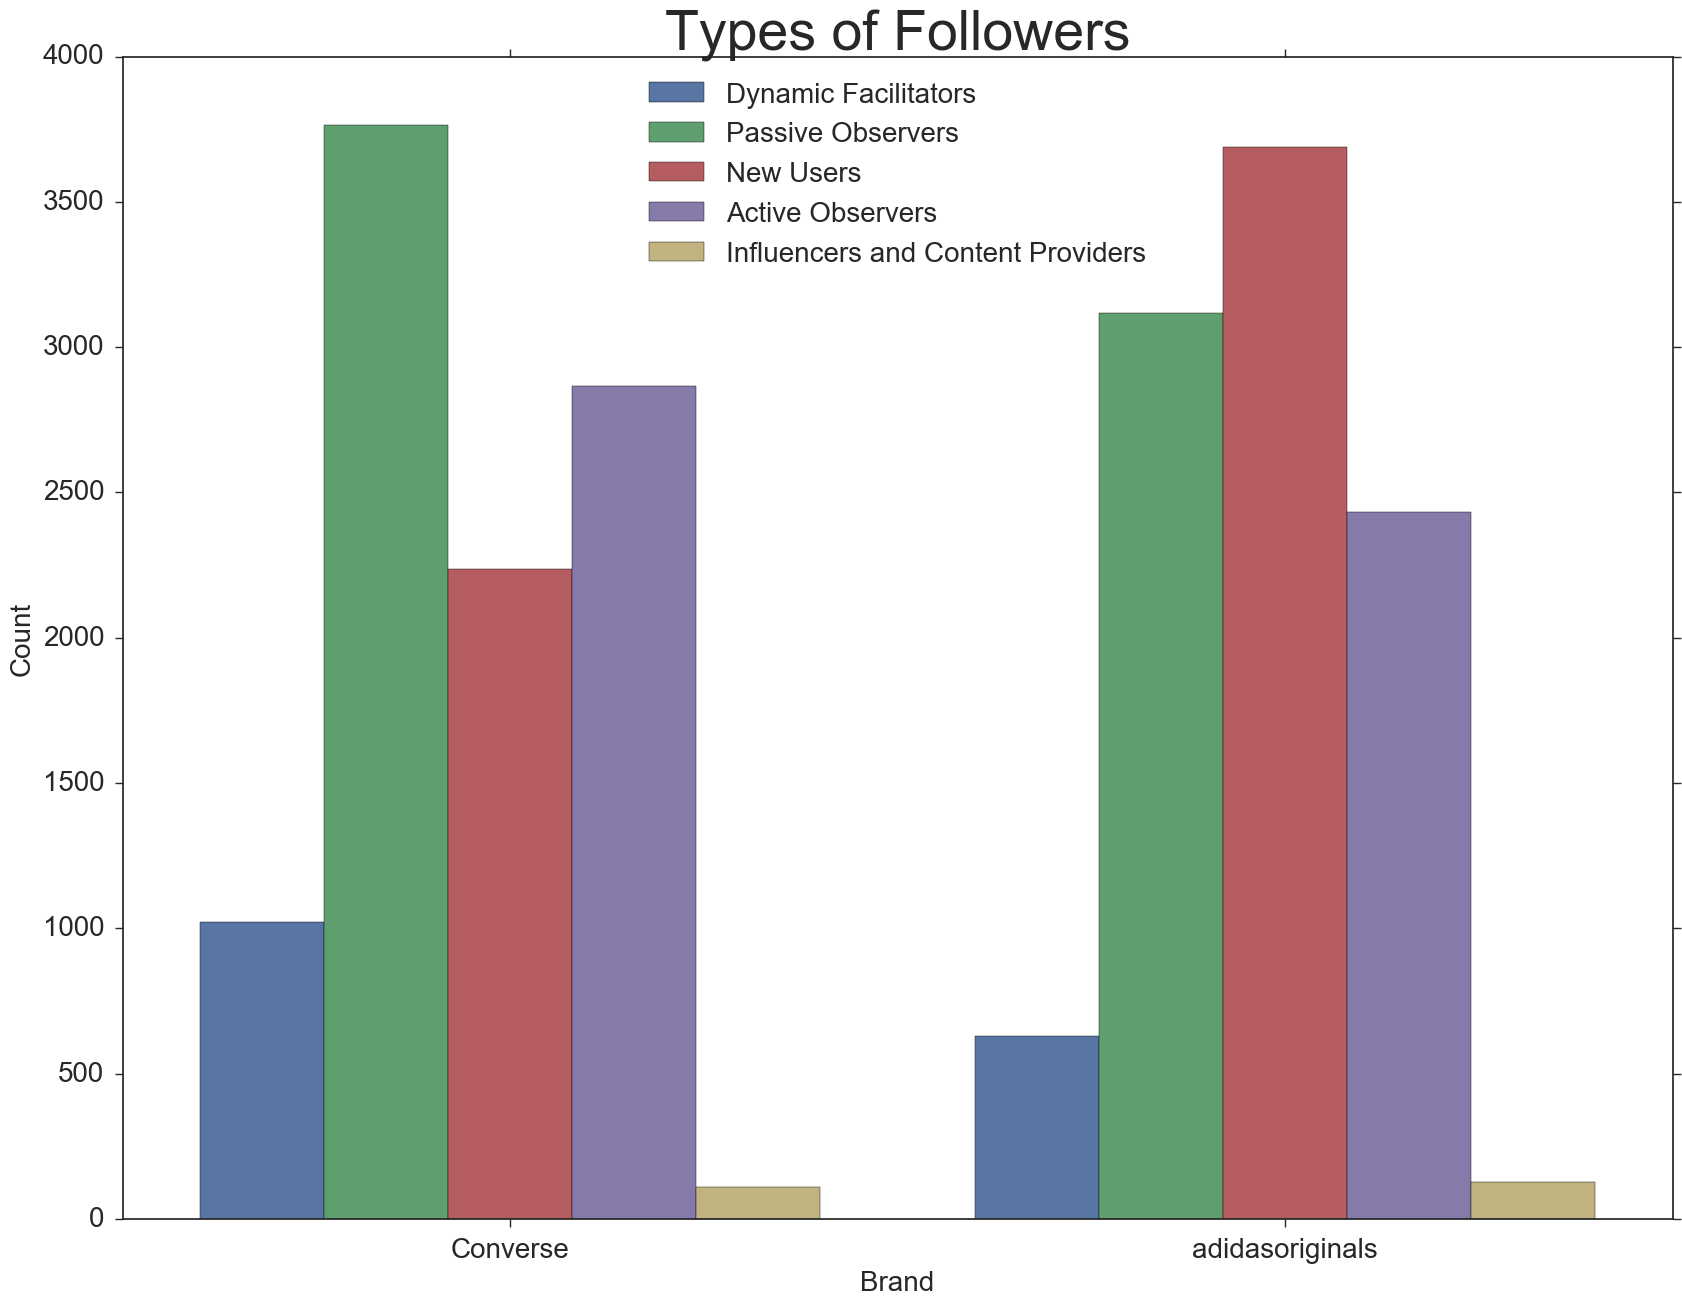

In [196]:
%matplotlib inline

sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(20, 15)

sns.countplot(x = "being_followed", hue = "Groups", data = df2)
ax.set_title('Types of Followers', fontsize=40)
ax.set_xlabel('Brand', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20)
ax.legend(loc=9, fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('follower_types.png')